# Analyze 2012-2016 Revenue Performance

In this challenge, I created a Python script for analyzing the financial records of PyBank.

This notebook will bring all the data sources together and format them for further analysis.


## Data Sources:
* revenue_2009_2016.csv : Processed data from the data-prep


Each dataset is composed of two columns: Date and Revenue.



### Task is to create a Python script that analyzes the records to calculate each of the following:

- The total number of months included in the dataset.

- The total amount of revenue gained over the entire period.

- The average change in revenue between months over the entire period.

- The greatest increase in revenue (date and amount) over the entire period.

- The greatest decrease in revenue (date and amount) over the entire period.


### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [3]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [4]:
# Directory Location and Filenames

dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [5]:
# Load Data into csv

df = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')
df[:5]

,Revenue
Date,
2009-01-01,943690.0
2009-02-01,1062565.0
2009-03-01,210079.0
2009-04-01,-735286.0
2009-05-01,842933.0


In [6]:
## Display - typeformat

pd.set_option('display.float_format', '{:,.0f}'.format)

In [7]:
df.dtypes

Revenue    float64
dtype: object

In [8]:
df.memory_usage(deep=True)

Index      688
Revenue    688
dtype: int64

## Exploratory Data Analysis (EDA)

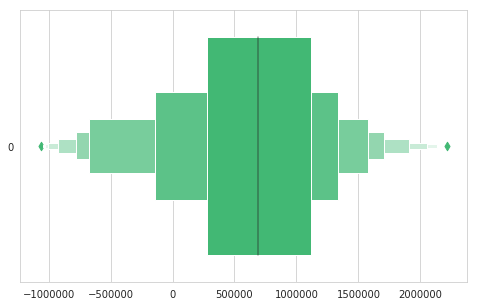

In [9]:
plt.figure(figsize=(8, 5))
ax = sns.boxenplot(data=df['Revenue'], orient='h', color='#2ecc71')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,86,"650,527","680,460","-1,063,151","279,551","686,900","1,118,162","2,211,086"


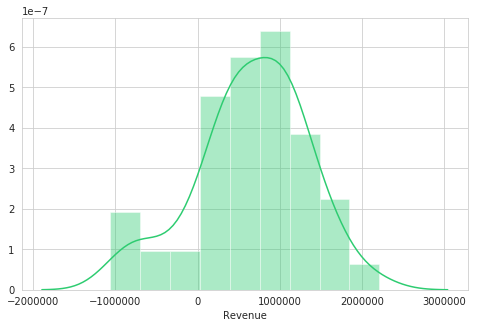

In [11]:
# Plot the Distribution for Revenue
plt.figure(figsize=(8, 5))
sns.distplot(df['Revenue'], color='#2ecc71')

### Monthly Revenue Across the Years

- Find out what months are profitable and months that have revenue losses.

In [12]:
# Monthly Revenues Across multiyear

dfmonth = pd.DataFrame(df.groupby([ df.index.month, df.index.year])['Revenue'].sum())
dfmonth.rename_axis(['month','year'], inplace=True)
dfmonth.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

In [13]:
# Get the Min/Max Revenue and the Month when

HRevenue = dfmonth.Revenue.max()
HLoss = dfmonth.Revenue.min()
dmax = max(dfmonth.idxmax())
dmin = min(dfmonth.idxmin())

print('On %s/%s was Highest monthly Revenue of $%.0f.' %(dmax[0], dmax[1], HRevenue ))
print('On %s/%s was Biggest monthly Loss of $%.00f.' %(dmin[0], dmin[1], HLoss ))

On 10/2012 was Highest monthly Revenue of $2211086.
On 9/2010 was Biggest monthly Loss of $-1063151.


In [14]:
# Monthly Revenue Averages across Y2009- 2016
dfmonth.reset_index(['month', 'year'], inplace=True)
Average_monthly = pd.DataFrame(dfmonth.groupby('month')['Revenue'].mean())
Average_monthly.style.applymap(color_negative_red).apply(highlight_max)

,Revenue
month,
1,610924
2,825064
3,416511
4,352896
5,1.03893e+06
6,426259
7,841166
8,364522
9,419863


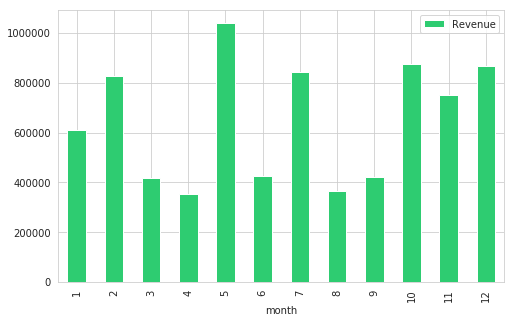

In [15]:
Average_monthly.plot(kind='bar', figsize=(8,5), color='#2ecc71')

Month of May is always profitable with a **Monthly Revenue Average Revenue = $1,038,000** since 2009 to 2016. No revenue losses where experienced on this month and the same is true for June and July months, but not as comparable to the magnitude of revenue performance of May.

---





### Monthly Revenues Year per Year

- Find-out what Year has the best Monthly Revenue Average so far.

In [16]:
# Monthly Revenues Per Year

dfmonth1 = pd.DataFrame(df.groupby([df.index.year,df.index.month])['Revenue'].sum())
dfmonth1.rename_axis(['year','month'], inplace=True)
dfmonth1.style.applymap(color_negative_red).apply(highlight_max)

Text(0.5,0,'Year')

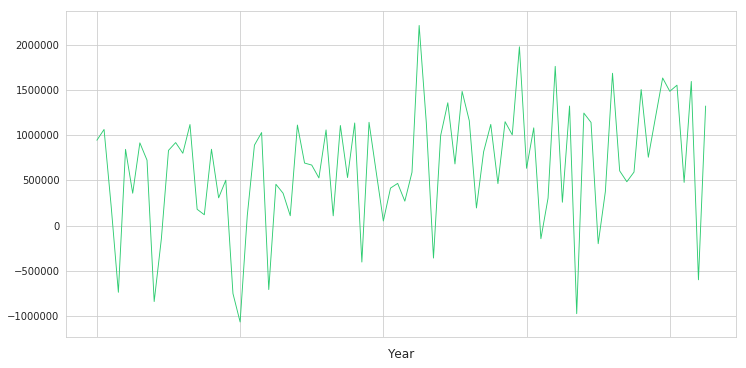

In [17]:
dfmonth1['Revenue'].plot(figsize=(12,6), linewidth=0.9, fontsize=10, color='#2ecc71')
plt.xlabel('Year', fontsize=12)

In [18]:
# Monthly Revenues Per Year

dfmonth2 = pd.DataFrame(df.groupby(df.index.year)['Revenue'].mean())
dfmonth2.rename_axis('year', inplace=True)
dfmonth2.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Revenue
year,
2009,423845
2010,340900
2011,502165
2012,604469
2013,1.03313e+06
2014,567201
2015,1.13007e+06
2016,361980


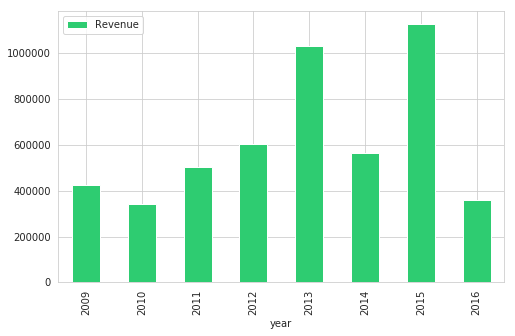

In [19]:
dfmonth2.plot(kind='bar', figsize=(8,5), color='#2ecc71')

In [20]:
# Get the Min/Max Revenue and the Month when

ymax = max(dfmonth2.idxmax())
rmax = dfmonth2.Revenue.max()
print("Year %s has the Highest Grossing Monthly Revenue Averages of $%0.0f." %(ymax,rmax))


Year 2015 has the Highest Grossing Monthly Revenue Averages of $1130070.


---

### Quarterly Revenue Across the Years

- Find-out what Quarter had the Highest Gross Revenue since 2009 to 2016.

> Let us compare the revenue performance like what quarter is the most profitable.


In [21]:
# Total Revenue per Quarter across multi-year
 
dfquarter = pd.DataFrame(df.groupby([ df.index.quarter, df.index.year])['Revenue'].sum())
dfquarter.rename_axis(['Quarter','Year'], inplace=True)
dfquarter.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

In [22]:
# Get the Min/Max Quarterly Revenue

QHrev= dfquarter.Revenue.max()
QHLoss = dfquarter.Revenue.min()
Qmax = max(dfquarter.idxmax())
Qmin = min(dfquarter.idxmin())

print('Highest Grossing Quarterly Revenue of $%.0f was observed on the %s quarter of %s.' %(QHrev,Qmax[0], Qmax[1] ))
print('Biggest Quarterly Loss of $%.00f was observed on the %s quarter of %s.' %(QHLoss,Qmin[0], Qmin[1] ))

Highest Grossing Quarterly Revenue of $4312011 was observed on the 3 quarter of 2015.
Biggest Quarterly Loss of $-1309489 was observed on the 3 quarter of 2010.


In [23]:
# Monthly Revenue Averages across Y2009- 2016
dq = dfquarter.reset_index(['Quarter', 'Year'])
Average_quarterly = pd.DataFrame(dq.groupby('Quarter')['Revenue'].mean())
Average_quarterly.style.applymap(color_negative_red).apply(highlight_max)

,Revenue
Quarter,
1,1.80043e+06
2,1.81809e+06
3,1.62555e+06
4,2.49091e+06


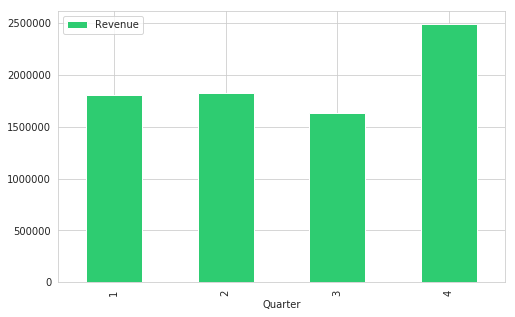

In [24]:
Average_quarterly.plot(kind='bar', figsize=(8,5),color='#2ecc71')

In [25]:
maxq = max(Average_quarterly.idxmax())
maxqr = Average_quarterly.max()


print('The %sth Quarter is the most profitable quarter with a Quarterly Average Revenue of $%0.0f.'%(maxq,maxqr))

The 4th Quarter is the most profitable quarter with a Quarterly Average Revenue of $2490909.


---

### Quarterly Revenue Year per Year

In [26]:
# Average Quarterly Revenue per Year

dfquarter1 = pd.DataFrame(df.groupby([ df.index.year,df.index.quarter ])['Revenue'].agg('sum'))
dfquarter1.rename_axis(['Year','Quarter'], inplace=True)
dfquarter1.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

In [27]:
dfquarter1.reset_index(['Year','Quarter'], inplace=True)
dq = pd.DataFrame(dfquarter1.groupby('Year')['Revenue'].mean())
dq.style.applymap(color_negative_red).apply(highlight_max)

,Revenue
Year,
2009,1.27153e+06
2010,1.0227e+06
2011,1.50649e+06
2012,1.81341e+06
2013,3.09939e+06
2014,1.7016e+06
2015,3.39021e+06
2016,723960


In [28]:
print('%s has the best quarterly revenue average of %0.0f.' %(max(dq.idxmax()),dq.Revenue.max()))

2015 has the best quarterly revenue average of 3390210.


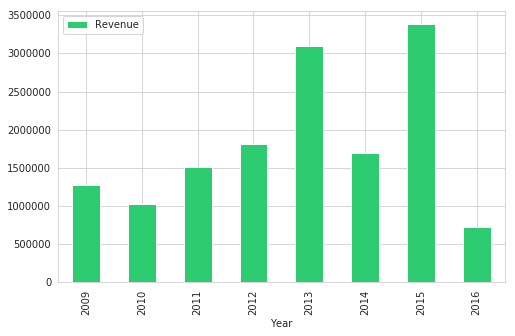

In [29]:
dq.plot(kind='bar', figsize=(8,5),color='#2ecc71')

- Now we know that 4th quarter is the most profitable period in terms of revenue averages.  Although records show that the 3rd quarter of 2015 observed the highest Gross Revenue of ```$2,490,909```, it is also on 3rd quarter of 2010 that experienced a heavy quarterly loss of ```$1,309,489```.


- 1st and 2nd quarter have no significant difference and follows the 4th quarter leader in terms of performance.




### Total Revenue Per Year

In [30]:
# Total Revenue Per Year

dfyear = pd.DataFrame(df.groupby(df.index.year)['Revenue'].sum())
dfyear.rename_axis('Year', inplace=True)
dfyear.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Revenue
Year,
2009,5.08614e+06
2010,4.0908e+06
2011,6.02598e+06
2012,7.25363e+06
2013,1.23976e+07
2014,6.80641e+06
2015,1.35608e+07
2016,723960


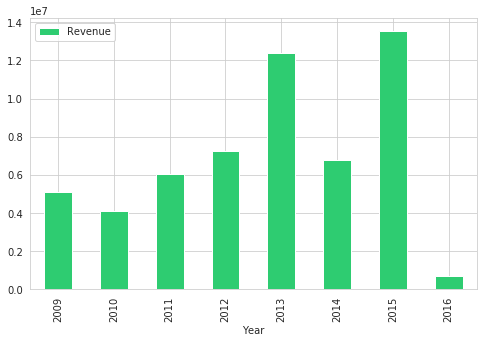

In [31]:
# We want to compare the Yearly Revenue Performance across the different years to detect seasonality and trends.

dfyear.plot(kind='bar', figsize=(8,5),color='#2ecc71')

In [32]:
most_Revenue_year = dfyear.Revenue.max()
most_profitable_year = max(dfyear.idxmax())
min_Revenue_year = dfyear.Revenue.min()
min_profitable_year = min(dfyear.idxmin())

print('%s is the Most Profitable Year with $%0.0f.'%(most_profitable_year, most_Revenue_year))
print('%s is the Least Profitable Year with only $%0.0f.'%(min_profitable_year, min_Revenue_year))

2015 is the Most Profitable Year with $13560842.
2016 is the Least Profitable Year with only $723960.


In [33]:
Total_Revenue = dfyear.Revenue.sum()

print('Total Revenue since {0} to {1}: ${2}'.format(dfyear.index.min(), 
                                                   dfyear.index.max(),
                                                  Total_Revenue))

Total Revenue since 2009 to 2016: $55945323.0


----

## EDA:

- 2015 is the most profitable year for the bank with a Total Revenue of $13,560,842.

   - Year 2015 had the best quarterly revenue average of $3,390,210.
   
   - Year 2015 had the Highest Grossing Monthly Revenue Averages of $1,130,070.
   

- 4th quarter is the most profitable business quarter with an Average Revenue of $2,490,909.


- Month of May is the most profitable business period with a Monthly Revenue Average Revenue of $1,038,000.



**Monthly:**
- 10/2012 - Highest monthly Revenue of $2,211,086.

- 09/2010 - Biggest monthly Loss of -$1,063,151.



**Quarterly:**

- 3rd quarter of 2015 had the highest grossing Q-Revenue of $4,312,011.

- 3rd quarter of 2010 had a heavy loss of $1,309,489.


**Year:**

- Max revenue gained in a year: $13560842.0

- Total Revenue since 2009 to 2016: $55945323.0
---
